# Задание 1, 2 

In [5]:
import pandas as pd

In [6]:
BAR = pd.read_csv('brent_prices.csv', sep=';')
RUB = pd.read_csv('dollar_curs.csv', sep=';')
INR = pd.read_csv('indian_curs.csv', sep=';')

#### Вывод данных из ДатаФреймов

In [7]:
BAR.head()

,<TICKER>,<PER>,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,ICE.BRN,M,20180901,77.69,83.41,75.64,82.98,3141389
1,ICE.BRN,M,20181001,82.97,86.74,74.58,74.59,4406167
2,ICE.BRN,M,20181101,74.69,74.99,57.78,59.07,4333185
3,ICE.BRN,M,20181201,59.98,63.73,50.22,54.15,3459773
4,ICE.BRN,M,20190101,54.12,63.15,52.51,61.22,3659813


In [8]:
RUB.head()

,curs,nominal,date
0,65.854527,1.0,2018-10-01
1,66.355681,1.0,2018-11-01
2,67.335314,1.0,2018-12-01
3,66.512544,1.0,2019-01-01
4,65.810525,1.0,2019-02-01


In [9]:
INR.head()

,curs,nominal,date
0,89.510109,100.0,2018-10-01
1,92.270848,100.0,2018-11-01
2,95.322173,100.0,2018-12-01
3,93.633431,100.0,2019-01-01
4,92.382145,100.0,2019-02-01


#### На данный момент имеем: 
BAR к доллару, Доллар к RUB, 100 Индийских рупий к Рублю. 
Приведём все данные к одной величине

#### 1 рубль - n долларов

In [10]:
RUB['curs'] = 1 / RUB['curs'] 

In [11]:
RUB.head()

,curs,nominal,date
0,0.015185,1.0,2018-10-01
1,0.015070,1.0,2018-11-01
2,0.014851,1.0,2018-12-01
3,0.015035,1.0,2019-01-01
4,0.015195,1.0,2019-02-01


#### 1 рупия - k долларов 
Массивы одинакового размера, поэтому так делать можно

In [12]:
INR['curs'] = INR['curs'] * RUB['curs'] / 100

In [13]:
INR.head()

,curs,nominal,date
0,0.013592,100.0,2018-10-01
1,0.013905,100.0,2018-11-01
2,0.014156,100.0,2018-12-01
3,0.014078,100.0,2019-01-01
4,0.014038,100.0,2019-02-01


#### Соберёмся всё в 1 ДатаФрейм

In [14]:
df = pd.DataFrame({'BAR': BAR['<CLOSE>'], 'RUB': RUB['curs'], 'INR': INR['curs']})

In [15]:
df.head()

,BAR,RUB,INR
0,82.98,0.015185,0.013592
1,74.59,0.015070,0.013905
2,59.07,0.014851,0.014156
3,54.15,0.015035,0.014078
4,61.22,0.015195,0.014038


# Задание 3 

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Построение графиков P-P и Q-Q для переменных BAR, RUB, INR

#### BAR

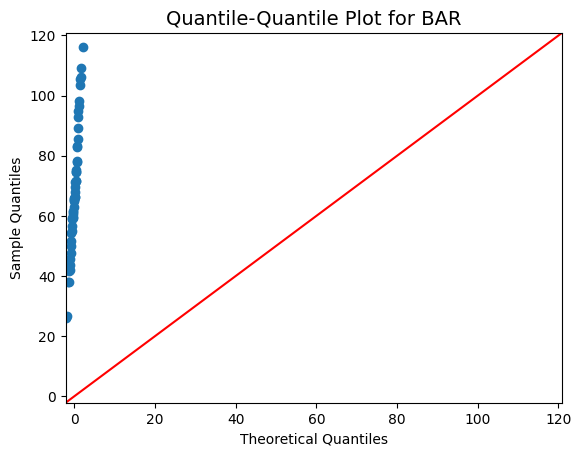

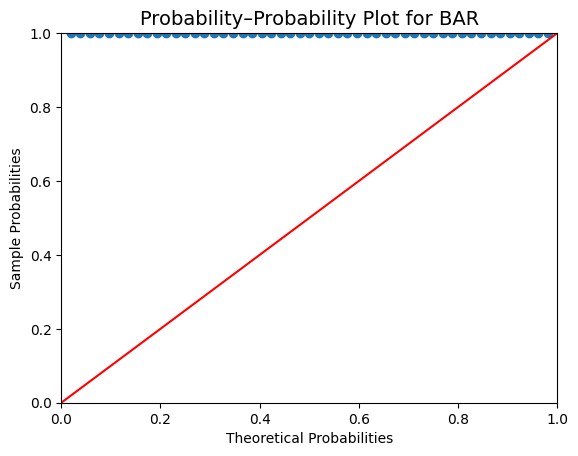

In [17]:
probplot = sm.ProbPlot(df['BAR'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for BAR', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for BAR', fontsize=14)

plt.show()

#### INR

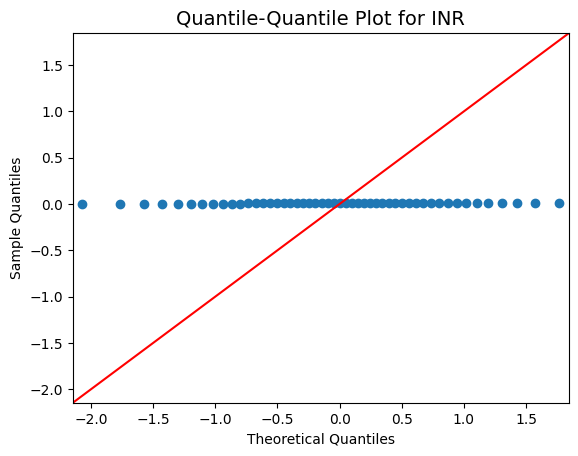

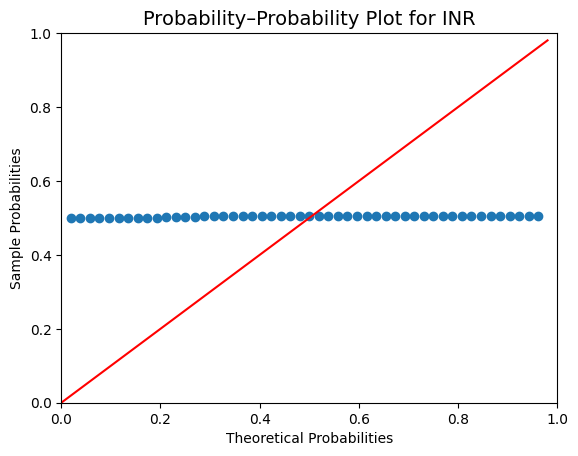

In [18]:
probplot = sm.ProbPlot(df['INR'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for INR', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for INR', fontsize=14)

plt.show()

#### RUB

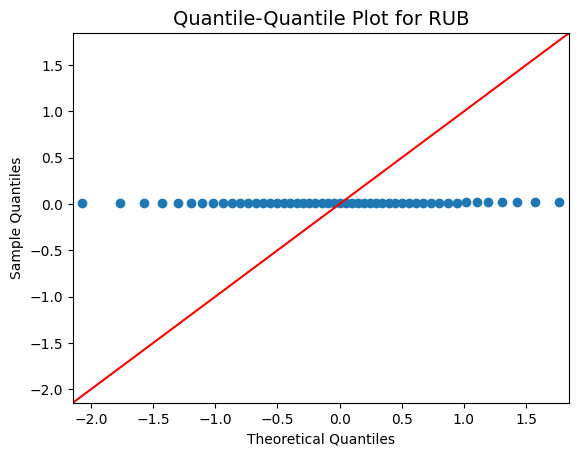

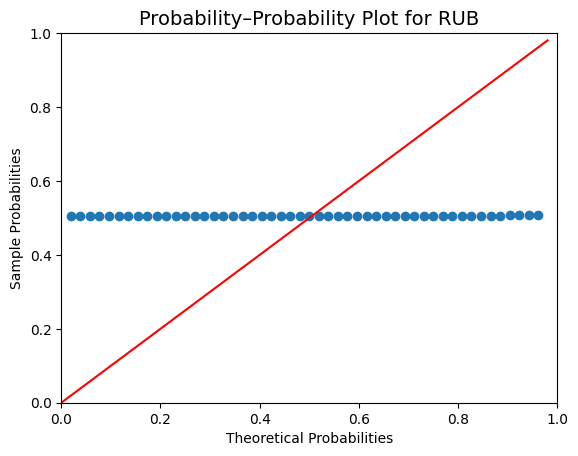

In [19]:
probplot = sm.ProbPlot(df['RUB'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for RUB', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for RUB', fontsize=14)

plt.show()

### Вывод: требуется стандартизация данных

In [20]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
scaler_range = preprocessing.MinMaxScaler()

#### Способ 1

In [21]:
for i in df.columns:
    df[i] = scaler_std.fit_transform(df[[i]])

#### Способ 2

In [18]:
for i in df.columns:
    df[i] = scaler_range.fit_transform(df[[i]])

In [22]:
df.head()

,BAR,RUB,INR
0,0.689864,0.469035,0.674907
1,0.290845,0.389128,0.737750
2,-0.447267,0.236362,0.788051
3,-0.681256,0.364364,0.772253
4,-0.345016,0.476109,0.764239


In [23]:
df = df.dropna()
df.head()

,BAR,RUB,INR
0,0.689864,0.469035,0.674907
1,0.290845,0.389128,0.737750
2,-0.447267,0.236362,0.788051
3,-0.681256,0.364364,0.772253
4,-0.345016,0.476109,0.764239


# Задание 4

#### Нахождение моды, медианы и среднего арифметического 

In [24]:
import statistics as st

In [25]:
def mmm(xxx):
    print("Среднее арифметическое значение столбца ",xxx," равно ",st.mean(df[xxx]))
    print("Медиана столбца ",xxx," равна ",st.median(df[xxx]))
    print("Мода столбца ",xxx," равна ",st.mode(df[xxx]))

In [26]:
def histmmm(xxx):
    fig, ax = plt.subplots()
    ax.vlines(st.mean(df[xxx]), 0, df[xxx].size, colors="Red", label="mean")
    ax.vlines(st.median(df[xxx]), 0, df[xxx].size, colors="Green", label="median")
    ax.vlines(st.mode(df[xxx]), 0, df[xxx].size, colors="Purple", label="mode")
    df[xxx].plot.hist()
    plt.title(f'Data Set Histogram for {xxx}', fontsize=14)
    plt.legend(title="Parameters:")
    plt.show()

#### Проверка для моды вручную:

In [27]:
def check_moda(xxx):
# Создаём пустой словарь, в котором будем считать количество появлений цен
    counts = {}
    for p in df[xxx]:
        if p not in counts:
            counts[p] = 1
        else:  
            counts[p] += 1

# df_count_BAR = pd.DataFrame({'BAR': BAR_counts})
# print(df_count_BAR)
# Проходимся по словарю и ищем максимальное количество повторений
    maxp = 0
    mode_price = None
    for k, v in counts.items():
        if maxp < v:
            maxp = v
            mode_price = k
    print("Мода вручную равна ",mode_price, maxp) 

#### Нахождение средних значений и построение гистограммы:

### BAR

Среднее арифметическое значение столбца  BAR  равно  -0.02674277639074399
Медиана столбца  BAR  равна  -0.1257696982271885
Мода столбца  BAR  равна  0.6898636268592696
Мода вручную равна  0.6898636268592696 1


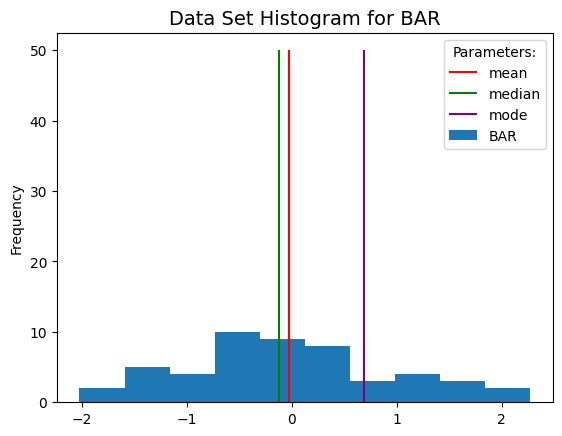

In [28]:
mmm('BAR')
check_moda('BAR')
histmmm('BAR')

### RUB

Среднее арифметическое значение столбца  RUB  равно  -7.47735207085043e-16
Медиана столбца  RUB  равна  -0.190099248974072
Мода столбца  RUB  равна  0.46903525754915415
Мода вручную равна  0.46903525754915415 1


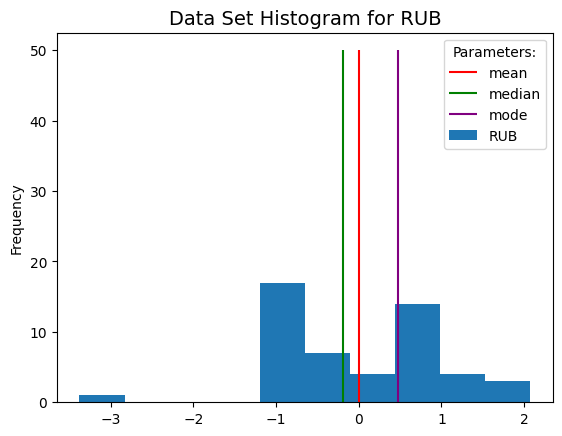

In [29]:
mmm('RUB')
check_moda('RUB')
histmmm('RUB')

### INR

Среднее арифметическое значение столбца  INR  равно  1.1740608485411032e-16
Медиана столбца  INR  равна  0.4743794278918055
Мода столбца  INR  равна  0.6749067583716413
Мода вручную равна  0.6749067583716413 1


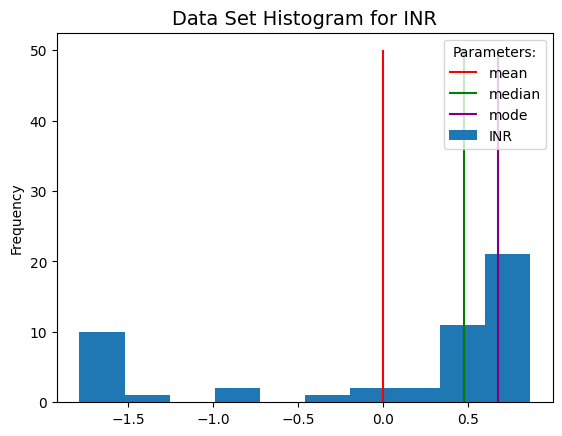

In [30]:
mmm('INR')
check_moda('INR')
histmmm('INR')

### Приблизительное равенство моды и среднего арифметического значения с медианой выполняется, поскольку данное распределение нормализовано

# Задание 5

#### Поскольку у нас 49 наблюдений, то воспользуемся критерием Шапиро-Уилка (7-2000 наблюдений)

In [31]:
from scipy import stats

### Критерий Шапиро-Уилка

### BAR

In [32]:
w = stats.shapiro(list(df['BAR']))
print(w)

ShapiroResult(statistic=0.9777415990829468, pvalue=0.4611488878726959)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value > 0.05, то гипотеза (распределение нормальное) принимается.

### RUB

In [33]:
w = stats.shapiro(list(df['RUB']))
print(w)

ShapiroResult(statistic=0.9334864020347595, pvalue=0.007505691144615412)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.

### INR

In [34]:
w = stats.shapiro(list(df['INR']))
print(w)

ShapiroResult(statistic=0.7235109210014343, pvalue=2.2425469481390792e-08)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отклоняется.

### Получается, нормальное распределение не выполняется для RUB и INR.

# Задание 6

#### Удаление наиболее заметных выбросов (используя межквартильный диапазон)

In [60]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)
#only keep rows in dataframe that have values within 1.5\*IQR of Q1 and Q3
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df.shape

(47, 3)

### RUB
#### Получили 48 наблюдений, снова воспользуемся критерием Шапиро-Уилка (7-2000 наблюдений)

In [61]:
w = stats.shapiro(list(df['RUB']))
print(w)

ShapiroResult(statistic=0.9071583151817322, pvalue=0.0012283945688977838)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.
#### Это связано с обработкой данных. Поскольку в некоторых месяцах за 1 число не было значений курса доллара к рублю, поэтому было посчитано среднее значение в каждом месяце 

#### Графическая проверка квартилями

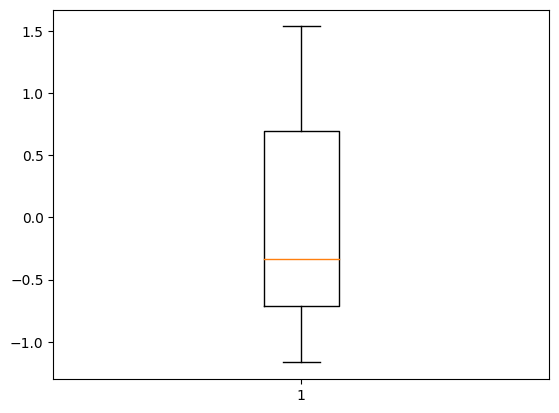

In [62]:
plt.boxplot(df['RUB'].values)
plt.show()

### INR

In [63]:
w = stats.shapiro(list(df['INR']))
print(w)

ShapiroResult(statistic=0.7246754169464111, pvalue=4.687733934360949e-08)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.

#### Графическая проверка квартилями

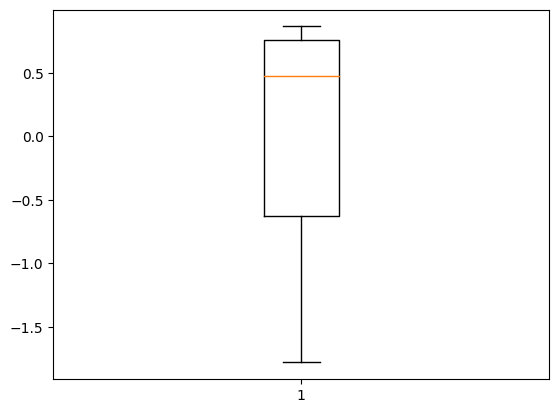

In [64]:
plt.boxplot(df['INR'].values)
plt.show()

# Задание 7

In [65]:
# # Ковариационная матрица
# cvm = df[['RUB', 'INR']].cov()
# print(cvm)

# Задание 8

In [66]:
# pr = stats.pearsonr(df['RUB'], df['INR'])
# print(pr)

# pr = stats.spearmanr(df['RUB'], df['INR'])
# print(pr)

# pr = stats.kendalltau(df['RUB'], df['INR'])
# print(pr)

# Задание 9

In [67]:
# from sklearn import datasets, linear_model
#
# # Create linear regression object
# regr = linear_model.LinearRegression()
#
# # Train the model using the training sets
# regr.fit(df.RUB.values.reshape(-1,1), table.INR.values)
# y_pred = regr.predict(df.RUB.values.reshape(-1,1))
# plt.plot(df.RUB.values, y_pred)
# plt.scatter(df.RUB.values, df.INR.values)
# plt.show()